In [14]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split

df = pd.read_csv("df_final_merged_all.csv") 

X = df.drop(columns=['TARGET', 'SK_ID_CURR'])
X = X.select_dtypes(include=['number'])
X = X.fillna(0)

y = df['TARGET']

# Split data ke training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Inisialisasi model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Training
rf.fit(X_train, y_train)

# Prediksi
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Evaluasi
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.50      0.00      0.00      4965

    accuracy                           0.92     61503
   macro avg       0.71      0.50      0.48     61503
weighted avg       0.89      0.92      0.88     61503

ROC AUC Score: 0.7036956919099443


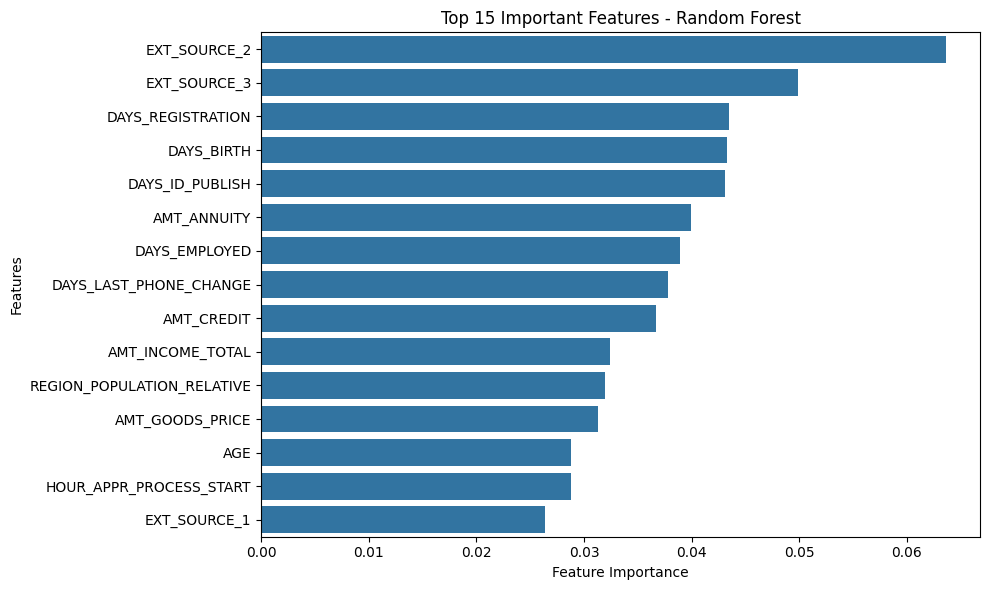

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil nama fitur dan importance-nya
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
top_features = feature_importance.sort_values(ascending=False).head(15)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 15 Important Features - Random Forest")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

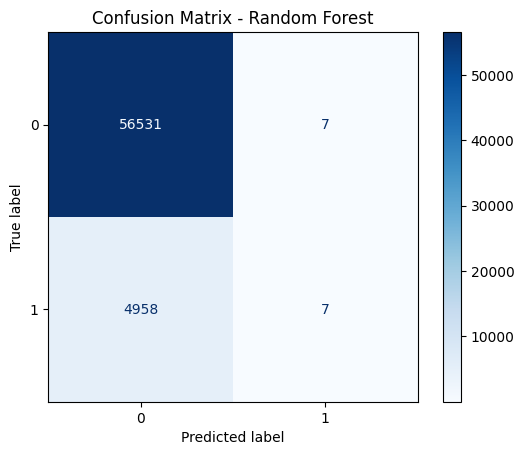

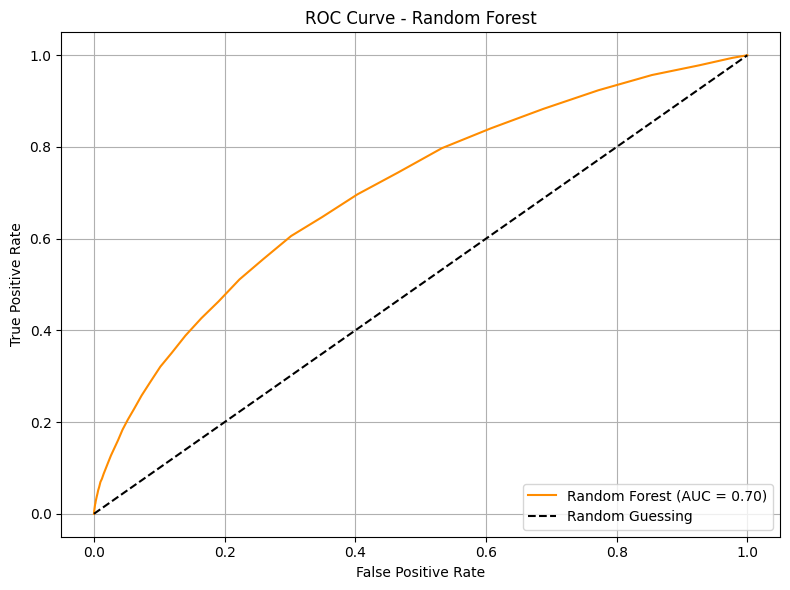

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
roc_auc = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.00      0.00      0.00      4965

    accuracy                           0.92     61503
   macro avg       0.46      0.50      0.48     61503
weighted avg       0.85      0.92      0.88     61503

ROC AUC Score: 0.626719075696204


/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


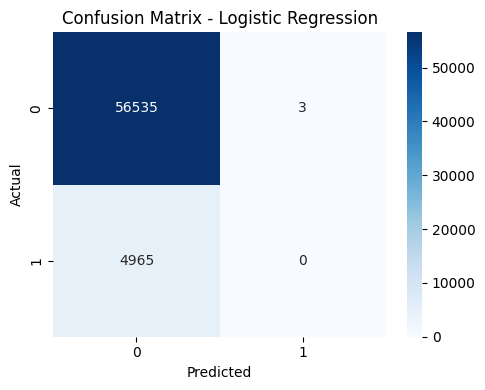

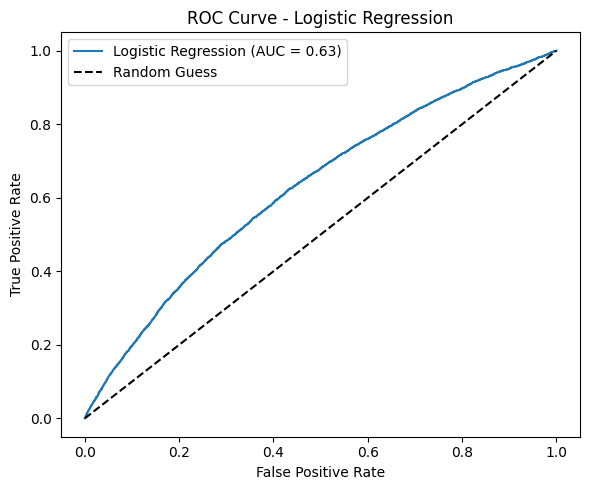

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Inisialisasi model
logreg = LogisticRegression(max_iter=1000, solver='lbfgs')  # solver disesuaikan agar stabil

# Training
logreg.fit(X_train, y_train)

# Prediksi
y_pred_log = logreg.predict(X_test)
y_prob_log = logreg.predict_proba(X_test)[:, 1]

# Evaluasi
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_log))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_log)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob_log)))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.tight_layout()
plt.show()

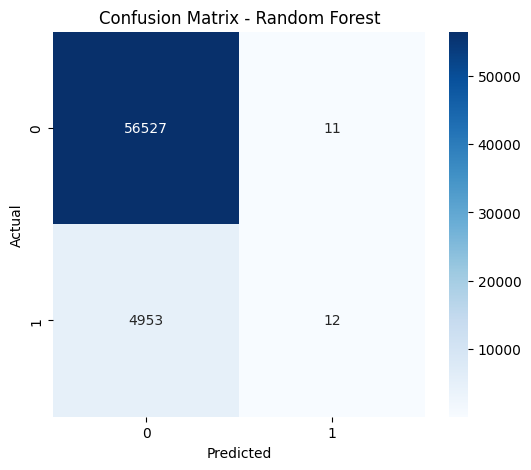

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.52      0.00      0.00      4965

    accuracy                           0.92     61503
   macro avg       0.72      0.50      0.48     61503
weighted avg       0.89      0.92      0.88     61503



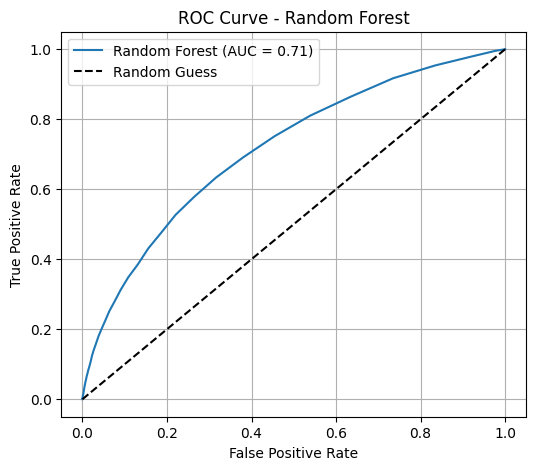

ROC AUC Score: 0.714222


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Inisialisasi model Random Forest
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

# 2. Prediksi
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# 3. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 4. Classification Report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# 5. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_rf)
roc_auc = roc_auc_score(y_test, y_proba_rf)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.grid()
plt.show()

# 6. Print AUC Score
print(f"ROC AUC Score: {roc_auc:.6f}")

/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


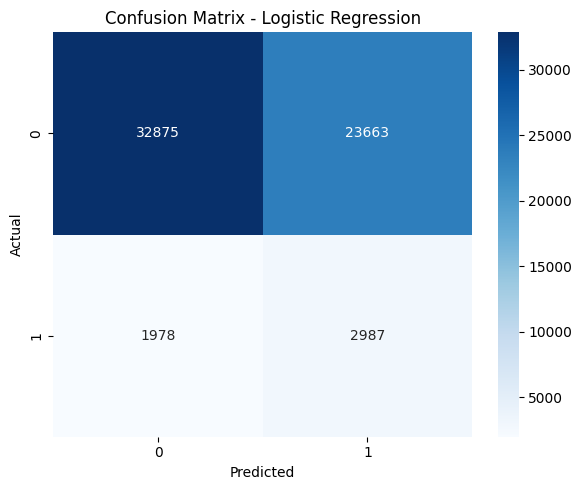

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.58      0.72     56538
           1       0.11      0.60      0.19      4965

    accuracy                           0.58     61503
   macro avg       0.53      0.59      0.45     61503
weighted avg       0.88      0.58      0.68     61503



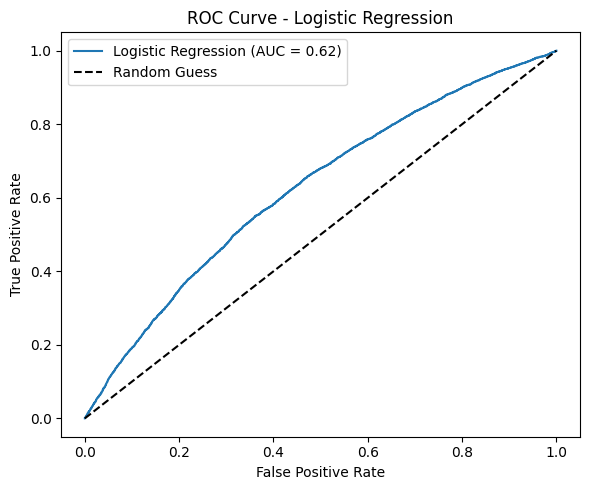

ROC AUC Score: 0.623819283714289


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Buat model
lr = LogisticRegression(max_iter=2000, class_weight='balanced', random_state=42)

# Latih model
lr.fit(X_train, y_train)

# Prediksi
y_pred_lr = lr.predict(X_test)
y_proba_lr = lr.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Classification Report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_lr)
auc_lr = roc_auc_score(y_test, y_proba_lr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc_lr:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label="Random Guess")
plt.title("ROC Curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()

# Cetak AUC
print("ROC AUC Score:", auc_lr)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.50      0.00      0.00      4965

    accuracy                           0.92     61503
   macro avg       0.71      0.50      0.48     61503
weighted avg       0.89      0.92      0.88     61503



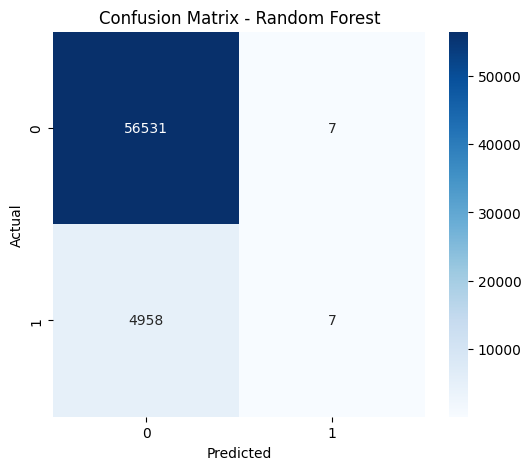

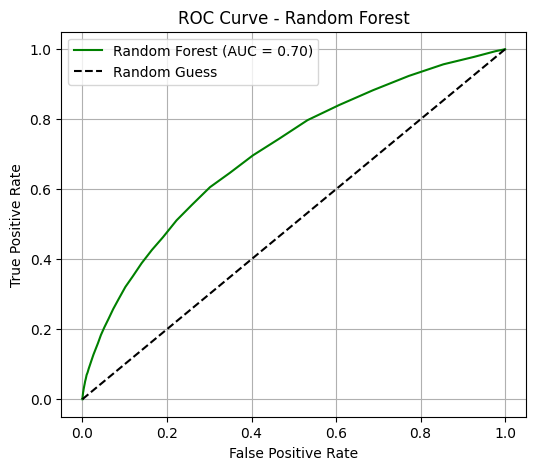

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Inisialisasi dan training model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Classification report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve dan AUC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)

plt.figure(figsize=(6, 5))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
pip install xgboost


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/opt/homebrew/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [19:45:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.59      0.01      0.02      4965

    accuracy                           0.92     61503
   macro avg       0.75      0.51      0.49     61503
weighted avg       0.89      0.92      0.88     61503



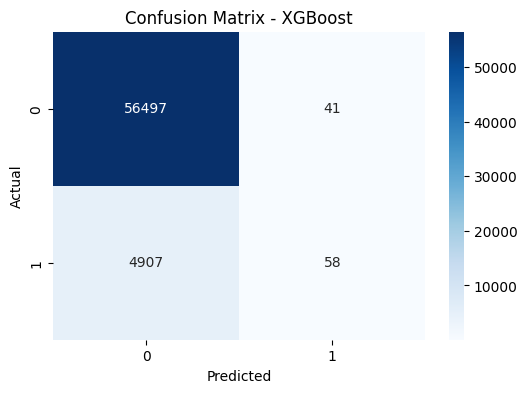

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/_plotting.py:175: FutureWarning: `**kwargs` is deprecated and will be removed in 1.9. Pass all matplotlib arguments to `curve_kwargs` as a dictionary instead.
  warnings.warn(


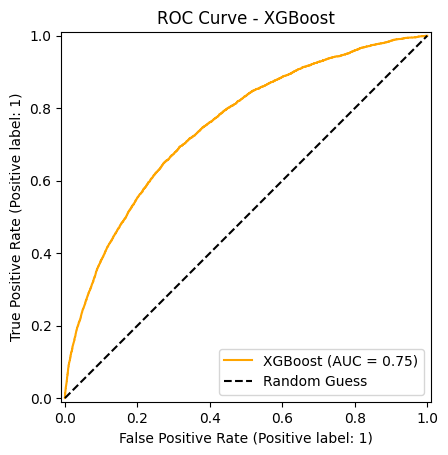

AUC Score - XGBoost: 0.75


In [24]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Inisialisasi Model XGBoost
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Training Model
xgb_model.fit(X_train, y_train)

# Prediksi
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluasi - Classification Report
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Evaluasi - Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluasi - ROC Curve
RocCurveDisplay.from_predictions(y_test, y_proba_xgb, name="XGBoost", color="orange")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve - XGBoost')
plt.legend()
plt.show()

# Evaluasi - AUC Score
auc_xgb = roc_auc_score(y_test, y_proba_xgb)
print(f"AUC Score - XGBoost: {auc_xgb:.2f}")


/opt/homebrew/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [19:54:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost with Balanced Class - Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.71      0.82     56538
           1       0.17      0.66      0.27      4965

    accuracy                           0.71     61503
   macro avg       0.56      0.69      0.54     61503
weighted avg       0.90      0.71      0.77     61503



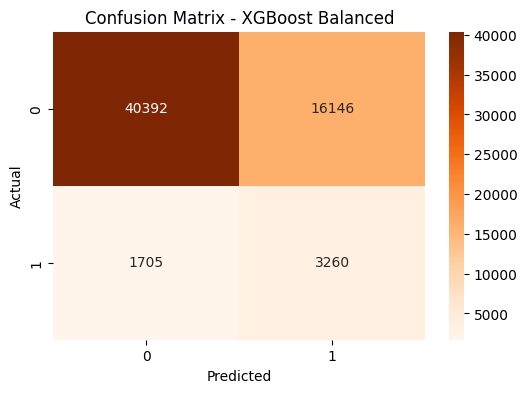

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/_plotting.py:175: FutureWarning: `**kwargs` is deprecated and will be removed in 1.9. Pass all matplotlib arguments to `curve_kwargs` as a dictionary instead.
  warnings.warn(


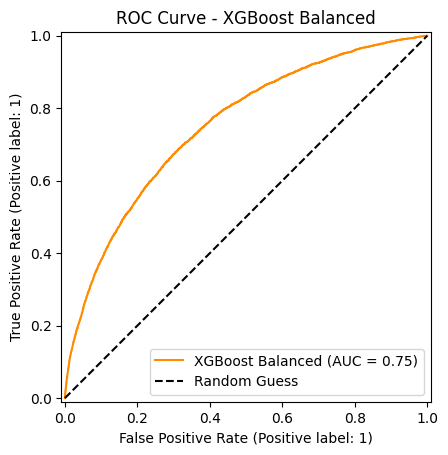

AUC Score - XGBoost Balanced: 0.75


In [25]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung rasio untuk scale_pos_weight
from collections import Counter
counter = Counter(y_train)
scale_weight = counter[0] / counter[1]

# Inisialisasi model XGBoost dengan penanganan class imbalance
xgb_balanced = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale_weight
)

# Training model
xgb_balanced.fit(X_train, y_train)

# Prediksi
y_pred_bal = xgb_balanced.predict(X_test)
y_proba_bal = xgb_balanced.predict_proba(X_test)[:, 1]

# Evaluasi - Classification Report
print("XGBoost with Balanced Class - Classification Report:")
print(classification_report(y_test, y_pred_bal))

# Confusion Matrix
cm_bal = confusion_matrix(y_test, y_pred_bal)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_bal, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - XGBoost Balanced')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
RocCurveDisplay.from_predictions(y_test, y_proba_bal, name="XGBoost Balanced", color="darkorange")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve - XGBoost Balanced')
plt.legend()
plt.show()

# AUC
auc_bal = roc_auc_score(y_test, y_proba_bal)
print(f"AUC Score - XGBoost Balanced: {auc_bal:.2f}")


In [26]:
from sklearn.metrics import classification_report

# Prediksi probabilitas dari model XGBoost yang sudah dilatih
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Thresholds yang ingin diuji
thresholds = [0.5, 0.4, 0.3, 0.2, 0.1]

for thresh in thresholds:
    print(f"\nThreshold = {thresh}")
    y_pred_thresh = (y_proba_xgb >= thresh).astype(int)
    print(classification_report(y_test, y_pred_thresh, digits=3))



Threshold = 0.5
              precision    recall  f1-score   support

           0      0.920     0.999     0.958     56538
           1      0.586     0.012     0.023      4965

    accuracy                          0.920     61503
   macro avg      0.753     0.505     0.490     61503
weighted avg      0.893     0.920     0.883     61503


Threshold = 0.4
              precision    recall  f1-score   support

           0      0.922     0.996     0.957     56538
           1      0.452     0.041     0.076      4965

    accuracy                          0.919     61503
   macro avg      0.687     0.518     0.517     61503
weighted avg      0.884     0.919     0.886     61503


Threshold = 0.3
              precision    recall  f1-score   support

           0      0.927     0.984     0.955     56538
           1      0.391     0.120     0.184      4965

    accuracy                          0.914     61503
   macro avg      0.659     0.552     0.569     61503
weighted avg      0.884

/opt/homebrew/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [20:22:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classification Report (Threshold = 0.5):
              precision    recall  f1-score   support

           0       0.96      0.71      0.82     56538
           1       0.17      0.66      0.27      4965

    accuracy                           0.71     61503
   macro avg       0.56      0.69      0.54     61503
weighted avg       0.90      0.71      0.77     61503



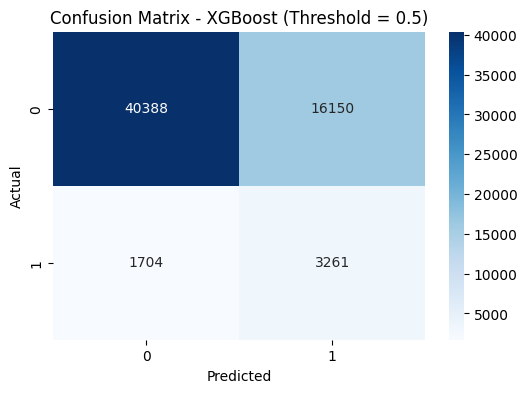

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/_plotting.py:175: FutureWarning: `**kwargs` is deprecated and will be removed in 1.9. Pass all matplotlib arguments to `curve_kwargs` as a dictionary instead.
  warnings.warn(


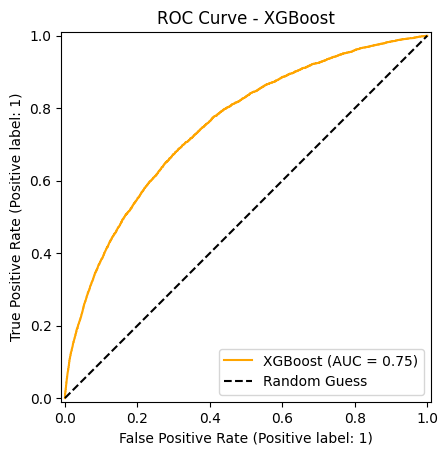

AUC Score - XGBoost: 0.75


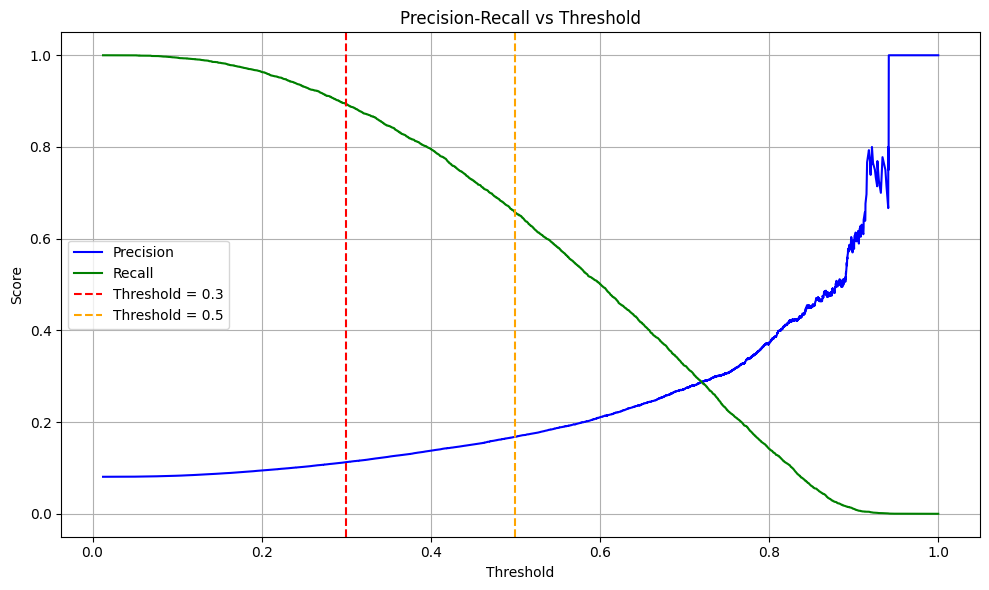


Classification Report (Threshold = 0.4):
              precision    recall  f1-score   support

           0       0.97      0.56      0.71     56538
           1       0.14      0.80      0.23      4965

    accuracy                           0.58     61503
   macro avg       0.55      0.68      0.47     61503
weighted avg       0.90      0.58      0.67     61503


Classification Report (Threshold = 0.3):
              precision    recall  f1-score   support

           0       0.98      0.38      0.55     56538
           1       0.11      0.89      0.20      4965

    accuracy                           0.42     61503
   macro avg       0.54      0.64      0.37     61503
weighted avg       0.91      0.42      0.52     61503



In [28]:
from xgboost import XGBClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    RocCurveDisplay,
    precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=11.39  # ditambahkan untuk mengatasi class imbalance
)
xgb_model.fit(X_train, y_train)


# 2. Prediksi Probabilitas dan Kelas Default (Threshold = 0.5)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
y_pred_xgb = (y_proba_xgb >= 0.5).astype(int)

# 3. Classification Report dan Confusion Matrix
print("XGBoost Classification Report (Threshold = 0.5):")
print(classification_report(y_test, y_pred_xgb))

cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost (Threshold = 0.5)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 4. ROC Curve dan AUC Score
RocCurveDisplay.from_predictions(y_test, y_proba_xgb, name="XGBoost", color="orange")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve - XGBoost')
plt.legend()
plt.show()

auc_xgb = roc_auc_score(y_test, y_proba_xgb)
print(f"AUC Score - XGBoost: {auc_xgb:.2f}")

# 5. Precision-Recall vs Threshold Plot
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_xgb)
thresholds = np.append(thresholds, 1.0)  # lengkapi titik threshold

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision, label='Precision', color='blue')
plt.plot(thresholds, recall, label='Recall', color='green')
plt.axvline(x=0.3, color='red', linestyle='--', label='Threshold = 0.3')
plt.axvline(x=0.5, color='orange', linestyle='--', label='Threshold = 0.5')
plt.title('Precision-Recall vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
for thresh in [0.4, 0.3]:
    print(f"\nClassification Report (Threshold = {thresh}):")
    y_pred_thresh = (y_proba_xgb >= thresh).astype(int)
    print(classification_report(y_test, y_pred_thresh))
